In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.columns


Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn

Text(0.5, 1.0, 'ScatterPlot')

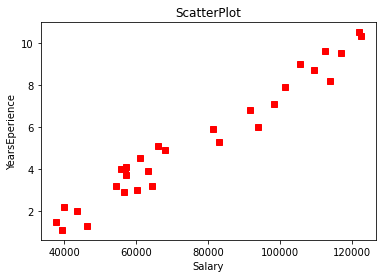

In [8]:
plt.plot(df.Salary,df.YearsExperience,"rs")
plt.xlabel("Salary")
plt.ylabel("YearsEperience")
plt.title("ScatterPlot")   



# Correlation

In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

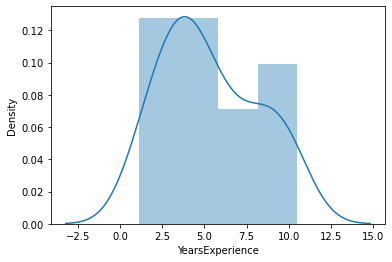

In [10]:
sn.distplot(df.YearsExperience)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

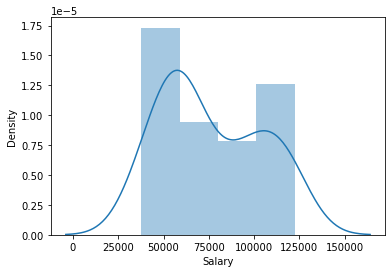

In [11]:
sn.distplot(df.Salary)

In [12]:
import statsmodels.formula.api as smf
model=smf.ols("YearsExperience~Salary",data=df).fit()
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        16:17:47   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model.resid

0    -0.500934
1    -0.995819
2     0.062306
3    -0.024427
4     0.543572
5    -0.452729
6    -0.707969
7     0.069752
8    -0.942905
9     0.291879
10   -0.118652
11    0.733144
12    0.615372
13    0.702815
14    0.694715
15    0.403374
16    0.796690
17   -0.730801
18    0.043883
19   -1.129735
20   -0.106748
21   -0.468520
22    0.024747
23   -0.942087
24    0.001558
25    0.691330
26    0.038218
27    0.577103
28    0.289155
29    0.541712
dtype: float64

In [15]:
pred=model.predict(df.Salary)
pred

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

In [16]:
model.resid_pearson

array([-0.83601202, -1.6619283 ,  0.1039828 , -0.04076678,  0.90717063,
       -0.75556182, -1.18153318,  0.11640909, -1.5736192 ,  0.48711814,
       -0.19801879,  1.22354877,  1.02699848,  1.1729327 ,  1.15941355,
        0.67319349,  1.32960101, -1.21963712,  0.07323614, -1.88542188,
       -0.17815314, -0.78191494,  0.0413    , -1.5722537 ,  0.00260051,
        1.15376408,  0.06378169,  0.96313051,  0.48257285,  0.90406645])

In [17]:
rmse_lin=np.sqrt(np.mean((np.array(df['YearsExperience'])-np.array(pred))**2))
rmse_lin

0.5788774181748746

Text(0, 0.5, 'YearsExperience')

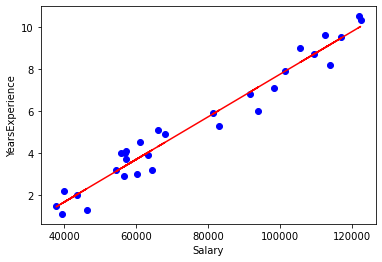

In [18]:
plt.scatter(x=df['Salary'],y=df['YearsExperience'],color='blue')
plt.plot(df['Salary'],pred,color='red')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')

In [19]:
model2=smf.ols('YearsExperience~np.log(Salary)',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           7.03e-18
Time:                        16:17:48   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -77.6961      4.241    -18.322      0.000     -86.383     -69.009
np.log(Salary)     7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pred2=model2.predict(pd.DataFrame(df['Salary']))
pred2

0     0.901345
1     2.095676
2     0.590552
3     1.651785
4     1.004105
5     3.608650
6     4.055053
7     3.314768
8     4.567424
9     3.680047
10    4.424619
11    3.496591
12    3.649849
13    3.666005
14    4.172803
15    4.959542
16    4.747810
17    6.454999
18    6.299145
19    7.366932
20    7.190723
21    7.701920
22    7.927435
23    8.792461
24    8.500852
25    8.234853
26    8.995721
27    8.715235
28    9.332335
29    9.300766
dtype: float64

In [21]:
pred2
rmse_log=np.sqrt(np.mean((np.array(df['YearsExperience'])-np.array(pred2))**2))
rmse_log

0.7277682036871291

Text(0, 0.5, 'YearsEperience')

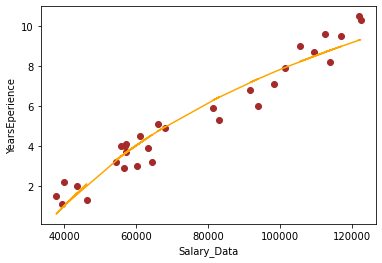

In [22]:
plt.scatter(x=df['Salary'],y=df['YearsExperience'],color='brown')
plt.plot(df['Salary'],pred2,color='orange')
plt.xlabel('Salary_Data')
plt.ylabel('YearsEperience')

In [23]:

model3=smf.ols('np.log(YearsExperience)~Salary',data=df).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.854
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                     163.6
Date:                     Tue, 17 Oct 2023   Prob (F-statistic):           3.25e-13
Time:                             16:17:49   Log-Likelihood:                0.92814
No. Observations:                       30   AIC:                             2.144
Df Residuals:                           28   BIC:                             4.946
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0942      0.133     -0.710      0.483      -0.366       0.178
Salary      2.104e-05   1.64e-06     12.792      0.000    1.77e-05    2.44e-05
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.772
Skew:                          -0.923   Prob(JB):                       0.0558
Kurtosis:                       4.099   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
pred_log=model3.predict(pd.DataFrame(df['Salary']))
pred_log


0     0.733613
1     0.877997
2     0.699694
3     0.821607
4     0.745143
5     1.097602
6     1.171414
7     1.051375
8     1.261786
9     1.109112
10    1.235969
11    1.079760
12    1.104230
13    1.106839
14    1.191635
15    1.335282
16    1.295115
17    1.654055
18    1.617759
19    1.882393
20    1.836060
21    1.973564
22    2.037297
23    2.300521
24    2.208340
25    2.127353
26    2.366948
27    2.275756
28    2.481032
29    2.470112
dtype: float64

In [25]:
pred3=np.exp(pred_log)
pred3

0      2.082591
1      2.406075
2      2.013138
3      2.274150
4      2.106743
5      2.996972
6      3.226553
7      2.861583
8      3.531723
9      3.031665
10     3.441710
11     2.943971
12     3.016901
13     3.024783
14     3.292460
15     3.801069
16     3.651416
17     5.228136
18     5.041779
19     6.569203
20     6.271779
21     7.196275
22     7.669850
23     9.979380
24     9.100597
25     8.392621
26    10.664790
27     9.735272
28    11.953599
29    11.823772
dtype: float64

In [26]:
rmse_exp=np.sqrt(np.mean((np.array(df['YearsExperience'])-np.array(pred3))**2))
rmse_exp

0.8649536763615348

In [27]:
pred3.corr(df.Salary)

0.9783258476228631

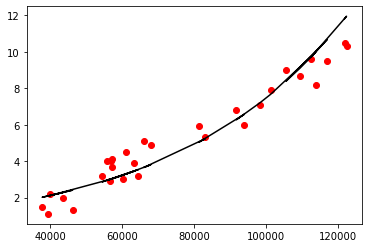

In [28]:
plt.scatter(x=df['Salary'],y=df['YearsExperience'],color='red')
plt.plot(df.Salary,pred3,color='black')

In [29]:
resid1=model3.resid_pearson
resid1

array([-2.62856286, -2.53520584, -1.21165179, -0.52900213,  0.1783699 ,
       -0.13544939, -0.29980314,  0.46029816, -0.40618444,  0.82040237,
        0.51478963,  1.26232636,  1.16155444,  1.25249551,  1.28665421,
        1.0457908 ,  1.37594637,  0.05621983,  0.64733073, -0.37323186,
        0.33299592, -0.05546522,  0.12175325, -0.80873095, -0.18538208,
        0.28773542, -0.47627671, -0.05762179, -0.61313045, -0.48896426])

Text(0, 0.5, 'Standardized Residual')

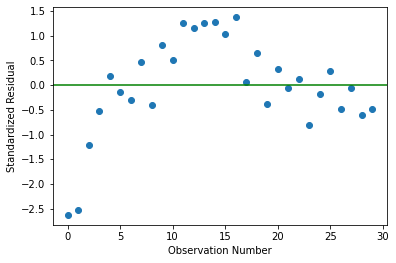

In [30]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

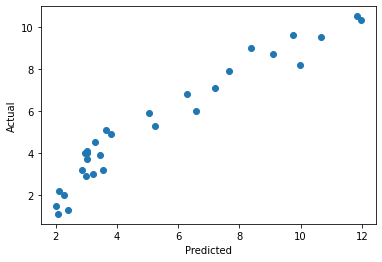

In [31]:
plt.scatter(x=pred3,y=df.YearsExperience)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [32]:
df['Salary_Sq']=df.Salary*df.Salary
df

,YearsExperience,Salary,Salary_Sq
0,1.1,39343.0,1.547872e+09
1,1.3,46205.0,2.134902e+09
2,1.5,37731.0,1.423628e+09
3,2.0,43525.0,1.894426e+09
4,2.2,39891.0,1.591292e+09
5,2.9,56642.0,3.208316e+09
6,3.0,60150.0,3.618022e+09
7,3.2,54445.0,2.964258e+09
8,3.2,64445.0,4.153158e+09
9,3.7,57189.0,3.270582e+09


In [33]:
#model4
model_quad=smf.ols("np.log(YearsExperience)~Salary+Salary_Sq",data=df).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.907
Model:                                 OLS   Adj. R-squared:                  0.901
Method:                      Least Squares   F-statistic:                     132.3
Date:                     Tue, 17 Oct 2023   Prob (F-statistic):           1.12e-14
Time:                             16:17:51   Log-Likelihood:                 7.7666
No. Observations:                       30   AIC:                            -9.533
Df Residuals:                           27   BIC:                            -5.330
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5369      0.381     -4.036      0.000      -2.318      -0.755
Salary      6.153e-05   1.03e-05      5.951      0.000    4.03e-05    8.27e-05
Salary_Sq  -2.514e-10   6.37e-11     -3.949      0.001   -3.82e-10   -1.21e-10
==============================================================================
Omnibus:                        3.765   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.504
Skew:                          -0.687   Prob(JB):                        0.286
Kurtosis:                       3.340   Cond. No.                     8.31e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
pred_quad=model_quad.predict(df)
pred4=np.exp(pred_quad)
pred4

0     1.640306
1     2.158776
2     1.532540
3     1.944664
4     1.678141
5     3.132728
6     3.507003
7     2.909766
8     3.992882
9     3.189644
10    3.851228
11    3.045589
12    3.165437
13    3.178363
14    3.613219
15    4.407015
16    4.178802
17    6.297870
18    6.082301
19    7.576149
20    7.332354
21    8.022489
22    8.303352
23    9.114878
24    8.901371
25    8.648772
26    9.216598
27    9.065610
28    9.284743
29    9.284136
dtype: float64

In [35]:
rmse_quad=np.sqrt(np.mean((np.array(df['YearsExperience'])-np.array(pred4))**2))
rmse_quad

0.7214302704516456

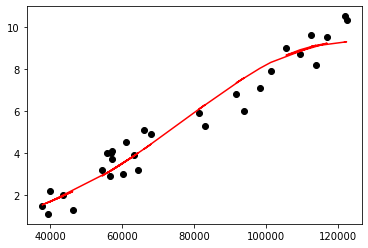

In [36]:
plt.scatter(df.Salary,df.YearsExperience,color='black')
plt.plot(df.Salary,pred4,color='red')

Text(0, 0.5, 'Standardized Residual')

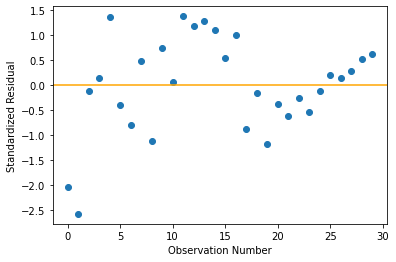

In [37]:
plt.scatter(np.arange(30),model_quad.resid_pearson)
plt.axhline(y=0,color='orange')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")


In [38]:
data={'MODEL':pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
      "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
      "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,0.578877,0.956957
1,rmse_log,0.727768,0.931967
2,rmse_exp,0.864954,0.853889
3,rmse_quad,0.721430,0.907383


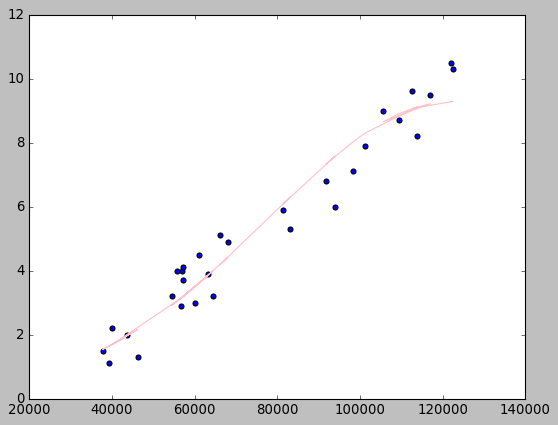

In [39]:
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.scatter(df.Salary,df.YearsExperience,c='b')
plt.plot(df.Salary,pred4,"pink")

In [40]:
#t and p-values

In [41]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -7.281283
Salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [42]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)